## AUTHOR: VAISHNAV KRISHNA P
#### Dataset source: https://www.kaggle.com/datasets/shivam2503/diamonds#
#### Github: https://www.github.com/vaishnavgithuber

#### ML WORKFLOW DIAGRAM 
1. DEFINE PROBLEM STATEMENT
2. DATA COLLECTION
3. EXPLORATIVE DATA ANALYSIS(EDA)
4. DATA CLEANING
5. DATA TRANSFORMATION
6. FEATURE ENGINEERING
7. DATA SPLITTING
8. MODEL SELECTION
9. MODEL TRAINING
10. HYPER PARAMETER TUNING
11. MODEL EVALUATION
12. MODEL DEPLOYMENT

### 1. PROBLEM STATEMENT 
- The objective is to build a predictive model that estimates the price of a diamond using its **physical dimensions, quality attributes, and grading characteristics.** The model will leverage **features such as carat, cut, color, clarity, and geometric measurements** to learn patterns influencing price. This is a supervised regression problem where price (in USD) is the target variable. The goal is to achieve accurate and reliable price predictions for unseen diamond samples.

### 2. DATA COLLECTION
The dataset is provided as a CSV file and is publicly available on the Kaggle platform. The file has been downloaded and is currently stored locally, and all analysis and model development are performed using a local Jupyter Notebook environment.

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [104]:
# Load the dataset & print the first 5 records
df = pd.read_csv("diamonds.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### 3. EDA(EXPLORATIVE DATA ANALYSIS)
- 3.1 BASIC DATASET INFORMATION
- 3.2 NUMERICAL FEATURE ANALYSIS
- 3.3 CATEGORICAL FEATURE ANALYSIS
- 3.4 VISUALISATION OF FEATURES

##### 3.1 BASIC DATASET INFORMATION

In [105]:
# Shape of the database
df.shape 

(53940, 11)

In [106]:
# Missing value analysis
df.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [107]:
# Description of the dataset 
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [108]:
# Information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [109]:
# Checking the duplicates
df.duplicated().sum()

np.int64(0)

In [110]:
## Categorical features & Categorical features
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

In [111]:
len(numerical_features), len(categorical_features)

(8, 3)

##### Observations
1. The dataset consists of 53,940 records with 11 features.
2. No missing values are present in the dataset.
3. All features have appropriate and consistent data types.
4. There is 11 numerical features and 3 categorical features. 

##### 3.2 NUMERICAL FEATURE ANALYSIS 

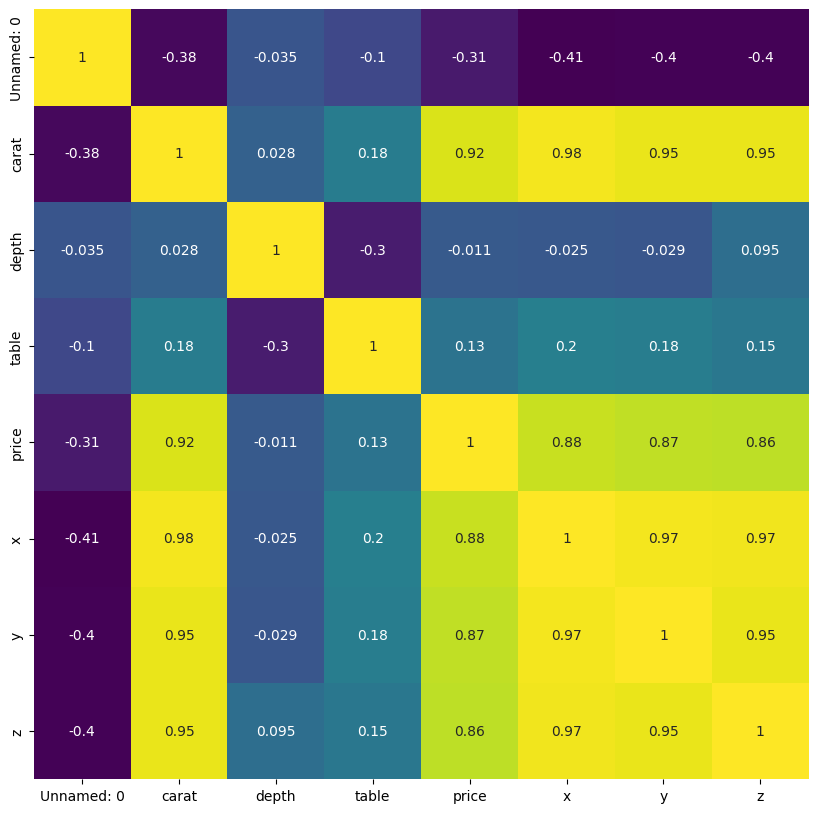

In [112]:
# Corelation for the numerical features 
plt.figure(figsize=(10,10))
sns.heatmap(df[numerical_features].corr(), annot=True, cbar=False, cmap='viridis')
plt.show()

###### Notes
- The features carat, x, y, and z are highly correlated with each other; therefore, any two or three of these features can be removed to reduce multicollinearity.
- The features most strongly correlated with price are carat, x, y, and z, each showing a correlation greater than 0.9.
- The column Unnamed: 0 is an index-like feature and does not contribute to prediction, so it can be safely omitted.
- The depth feature shows a very weak relationship with price and has limited impact on diamond price prediction.

##### 3.3 CATEGORICAL FEATURE ANALYSIS 

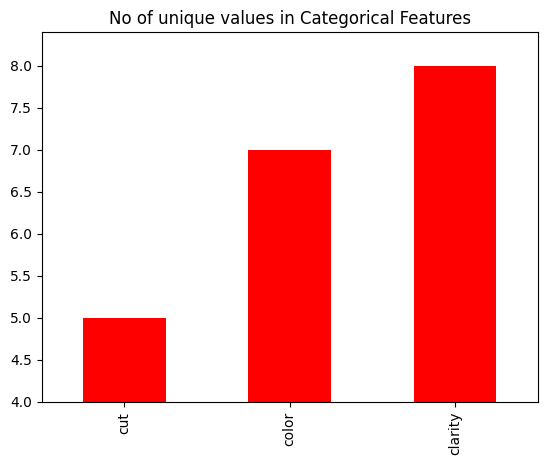

In [113]:
# Let's check the no of values 
plt.title("No of unique values in Categorical Features")
df[categorical_features].nunique().plot(kind='bar', color='red')
plt.ylim(4)
plt.show()

###### Notes 
- The categorical features are clean & well.

##### 3.4 VISUALISATION OF FEATURES

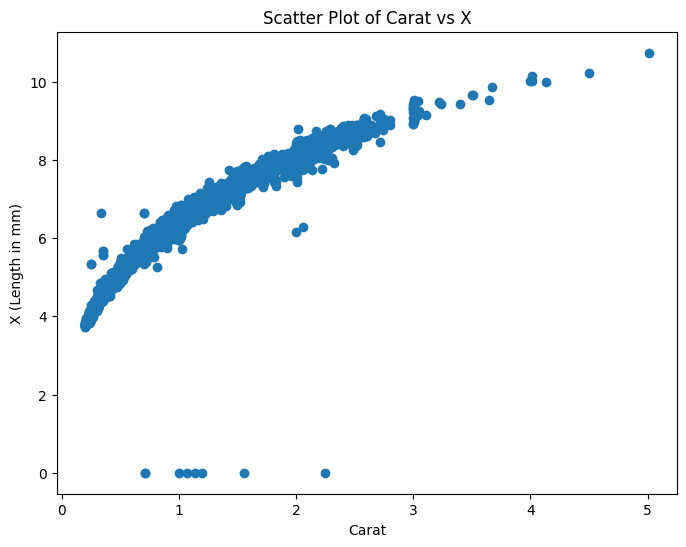

In [114]:
# Scatter plot 
plt.figure(figsize=(8, 6))
plt.scatter(df['carat'], df['x'])
plt.xlabel('Carat')
plt.ylabel('X (Length in mm)')
plt.title('Scatter Plot of Carat vs X')
plt.show()

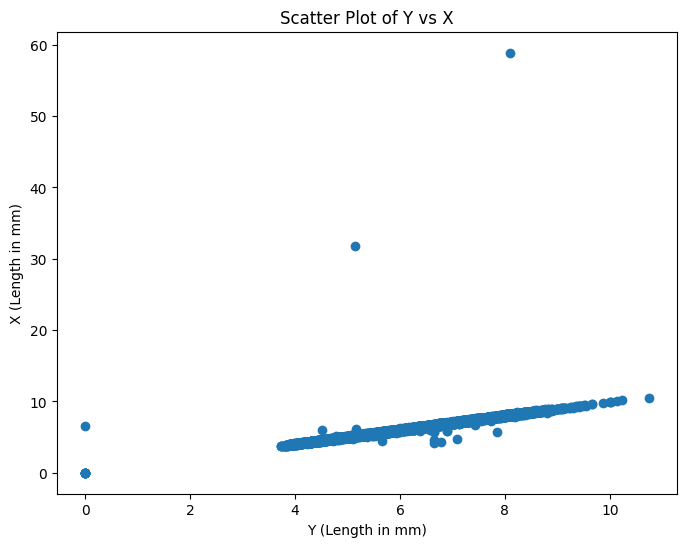

In [115]:
plt.figure(figsize=(8, 6))
plt.scatter(df['x'], df['y'])
plt.xlabel('Y (Length in mm)')
plt.ylabel('X (Length in mm)')
plt.title('Scatter Plot of Y vs X')
plt.show()

- Highly corelated for the scatter plot

/var/folders/15/6wmpjnb12xv6kx2m290xw72c0000gn/T/ipykernel_1085/777025344.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['x'], df['y'], df['z']], labels=['x', 'y', 'z'])


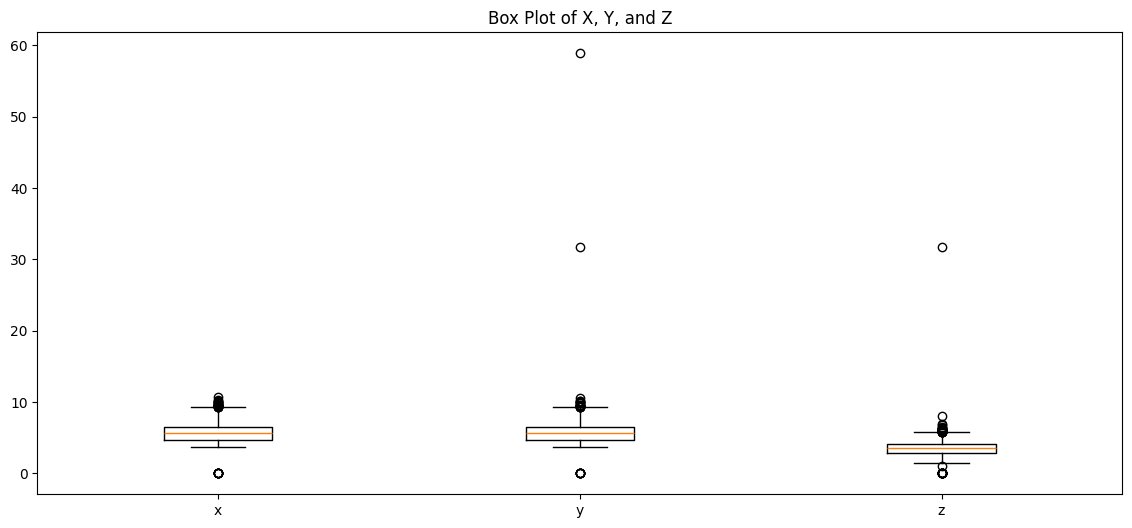

In [116]:
# Box plot for x,y,z
plt.figure(figsize=(14, 6))
plt.boxplot([df['x'], df['y'], df['z']], labels=['x', 'y', 'z'])
plt.title('Box Plot of X, Y, and Z')
plt.show()

/var/folders/15/6wmpjnb12xv6kx2m290xw72c0000gn/T/ipykernel_1085/1828648491.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df['price']], labels=['price'])


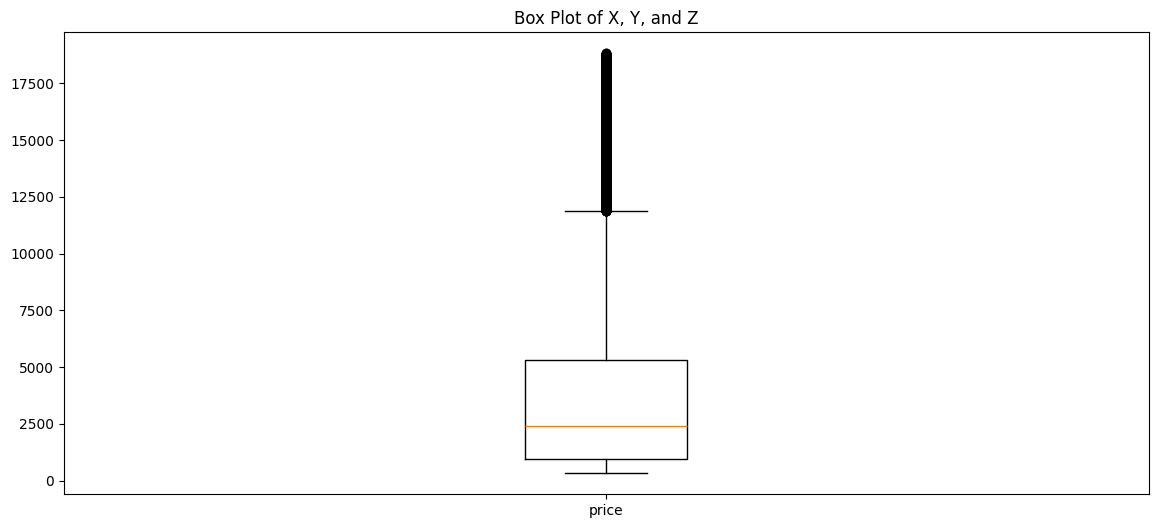

In [117]:
# Box plot for the price
plt.figure(figsize=(14, 6))
plt.boxplot([df['price']], labels=['price'])
plt.title('Box Plot of X, Y, and Z')
plt.show()

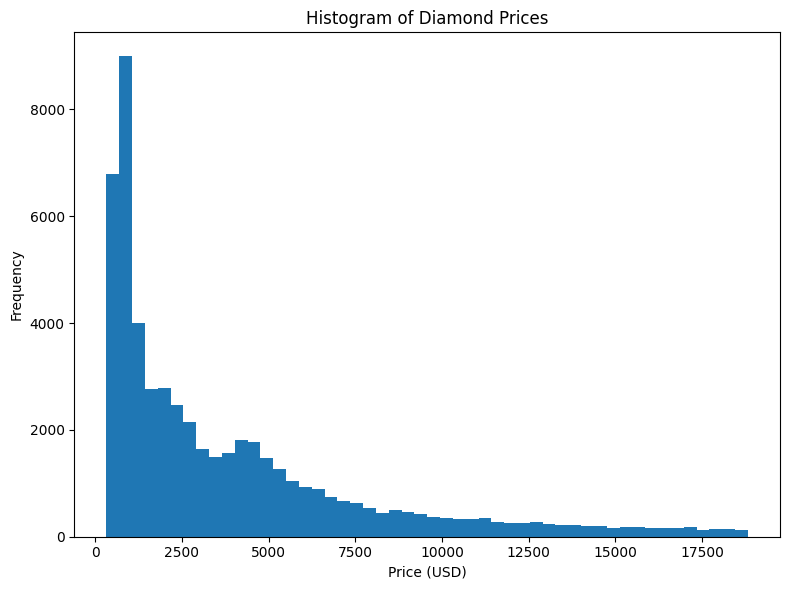

In [118]:
# Histogram for the price
plt.figure(figsize=(8, 6))
plt.hist(df['price'], bins=50)
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.title('Histogram of Diamond Prices')
plt.tight_layout()
plt.show()

###### NOTES
- The distribution of the price is skewed, and has to be handled by applying the transformation
- Price feature has lot of outliers

#### 4. DATA CLEANING
The dataset is already clean, with no missing values or duplicate records. All features have appropriate data types, and unnecessary columns (like Unnamed: 0) can be omitted. Therefore, no further cleaning is required, and we can proceed directly to data transformation and feature preparation for modeling.

#### 5. DATA TRANSFORMATION
- 5.1 CONVERTING CATEGORICAL FEATURES TO NUMERICAL FEATURES
- 5.2 APPLYING LOG TRANSFORMATION

##### 5.1 CONVERTING CATEGORICAL FEATURES TO NUMERICAL FEATURES

In [119]:
categorical_features

['cut', 'color', 'clarity']

In [120]:
dict_cut = {
    'Ideal' : 0,
    "Premium":1,
    "Good":2,
    "Very Good":3,
    "Fair":4
}
# Converting the categorical features to numerical for cut features
df['cut'] = df['cut'].map(dict_cut)

In [121]:
dict_color = {
    'E':0,
    'I':1,
    "J":2,
    "H":3,
    "F":4,
    "G":5,
    "D":6
}
df['color'] = df['color'].map(dict_color)

In [122]:
dict_clarity = {
    "SI2":0,
    "SI1":1,
    "VS1":2,
    "VS2":3,
    "VVS2":4,
    "VVS1":5,
    "I1":6,
    "IF":7
}
df['clarity'] = df['clarity'].map(dict_clarity)

##### 5.2 APPLYING LOG TRANSFORMATION

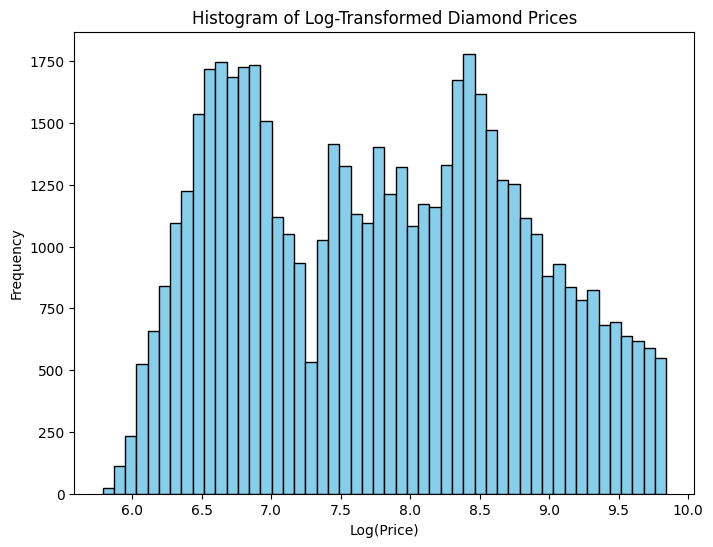

In [123]:
# Create a new column for log-transformed price
df['log_price'] = np.log(df['price'])

plt.figure(figsize=(8,6))
plt.hist(df['log_price'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.title('Histogram of Log-Transformed Diamond Prices')
plt.show()


#### 6. FEATURE ENGINEERING

##### REMOVING UNWANTED FEATURES

In [124]:
# Remove the features 'x', 'y', 'z', 'Unnamed: 0'
df.drop(columns=['x', 'y', 'z', 'Unnamed: 0', "log_price"], inplace=True)

In [125]:
df.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,0,0,0,61.5,55.0,326
1,0.21,1,0,1,59.8,61.0,326
2,0.23,2,0,2,56.9,65.0,327
3,0.29,1,1,3,62.4,58.0,334
4,0.31,2,2,0,63.3,58.0,335


#### 7. DATA SPLITTING

##### TRAIN TEST SPLIT 

In [126]:
from sklearn.model_selection import train_test_split

In [127]:
# Features and target
X = df.drop(columns=['price']) 
y = df['price']                 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [128]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((43152, 6), (10788, 6), (43152,), (10788,))

##### APPLYING LOG TRANSFORMATION OF TRAINING DATASET

In [130]:
y_train_log = np.log(y_train)

#### 8. MODEL SELECTION
###### SPOT CHECKING WITH
- 1. Linear Regression
  2. Rodge Regression
  3. Random Forest Regressor
  4. Gradient Boosting Regressor

In [131]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [136]:
# Dictionary to store models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

results = []

for name, model in models.items():
    # Train on log-transformed target
    model.fit(X_train, y_train_log)
    
    # Predict in log scale
    y_pred_log = model.predict(X_test)
    
    # Reverse log transformation to original scale
    y_pred = np.exp(y_pred_log)
    
    # Calculate metrics on original scale
    rmse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Append results
    results.append({'Model': name, 'RMSE': rmse, 'MAE': mae, 'R2': r2})

# Display results
print("Model Performance Comparison:\n")
print(results)

Model Performance Comparison:

[{'Model': 'Linear Regression', 'RMSE': 979971447.9568582, 'MAE': 2288.651371481073, 'R2': -60.64574792272126}, {'Model': 'Ridge Regression', 'RMSE': 978455261.0756797, 'MAE': 2287.7694642598644, 'R2': -60.550371190597346}, {'Model': 'Random Forest', 'RMSE': 320996.9564423461, 'MAE': 286.7606140828578, 'R2': 0.979807475511596}, {'Model': 'Gradient Boosting', 'RMSE': 508656.79128107824, 'MAE': 366.6574865069168, 'R2': 0.9680026102802599}]


##### ACCURACY COMPARISON 

In [142]:
results_df = pd.DataFrame(results)

# Round numeric columns for readability
results_df[['RMSE', 'MAE', 'R2']] = results_df[['RMSE', 'MAE', 'R2']].round(3)

# Print
print("Model Performance Comparison:\n")
print(results_df)

Model Performance Comparison:

               Model          RMSE       MAE      R2
0  Linear Regression  9.799714e+08  2288.651 -60.646
1   Ridge Regression  9.784553e+08  2287.769 -60.550
2      Random Forest  3.209970e+05   286.761   0.980
3  Gradient Boosting  5.086568e+05   366.657   0.968


- So, we select the Random forest algorithms

#### 9. MODEL TRAINING

In [143]:
rf_model = RandomForestRegressor(
    n_estimators=200,  
    max_depth=None,    
    random_state=42,
    n_jobs=-1        
)


rf_model.fit(X_train, y_train_log)
y_pred_log = rf_model.predict(X_test)
y_pred = np.exp(y_pred_log)

#### 10. HYPERPARAMETER TUNING
- The Random Forest model has already achieved excellent performance on the diamond price prediction task.
- Given the high R² and low RMSE/MAE, further hyperparameter tuning is not critical for this analysis.
- However, in a production scenario or for slightly better optimization, parameters such as n_estimators, max_depth, or min_samples_leaf could be tuned using techniques like Grid Search or Randomized Search.

#### 11. MODEL EVALUATION

In [146]:
import joblib

In [147]:
rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Model Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")

# 🔹 10️⃣ Save the trained model
joblib.dump(rf_model, 'random_forest_diamond_model.pkl')
print("\nModel saved as 'random_forest_diamond_model.pkl'")

Random Forest Model Performance:
RMSE: 320369.17
MAE: 286.49
R²: 0.9798

Model saved as 'random_forest_diamond_model.pkl'


#### 12 MODEL DEPLOYMENT 

In [152]:
import joblib

rf_model = joblib.load('random_forest_diamond_model.pkl')

print("Enter diamond details:")

carat = float(input("Carat (e.g., 0.5): "))
cut = input("Cut (Fair, Good, Very Good, Premium, Ideal): ")
color = input("Color (D, E, F, G, H, I, J): ")
clarity = input("Clarity (I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF): ")
# x = float(input("Length x (mm): "))
# y = float(input("Width y (mm): "))
# z = float(input("Depth z (mm): "))
depth = float(input("Depth %: "))
table = float(input("Table % (e.g., 55): "))

# 3️⃣ Create a DataFrame for the single input
# Note: The model expects the same preprocessing as training (no log on features)
input_df = pd.DataFrame({
    'carat': [carat],
    'cut': [dict_cut[cut]],
    'color': [dict_color[color]],
    'clarity': [dict_clarity[clarity]],
    'depth': [depth],
    'table': [table]
})

pred_log = rf_model.predict(input_df)

# Reverse log-transform to get actual price
pred_price = np.exp(pred_log)

print(f"\nPredicted Diamond Price: ${pred_price[0]:,.2f}")

Enter diamond details:


Carat (e.g., 0.5):  0.23
Cut (Fair, Good, Very Good, Premium, Ideal):  Ideal
Color (D, E, F, G, H, I, J):  E
Clarity (I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF):  SI2
Depth %:  61.5
Table % (e.g., 55):  55



Predicted Diamond Price: $367.37


In [ ]:
### Actual Price was : $326, ie, Model works well